In [67]:
import numpy as np
import pandas as pd
import yfinance as yf
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_rows", None)


In [68]:
df = pd.read_csv('/Users/kritinkhowala/Desktop/AQUA+QI/Monthly_Macro_data.csv')

In [69]:
selected_columns = [
    "Year",
    "CPI Inflation Rate (in %)",          # Inflation
    "Index of Industrial Production",     # Production
    "Domestic Credit % of GDP",   # Sentiment
    "Reserves as a percentage of Import", # Market regime
    "Fiscal Deficit as % of GDP",             # Debt
    "Repo Rate"                           # Inflation expectations
]

df_hmm = df[selected_columns].copy()

In [70]:
df_hmm.head()

,Year,CPI Inflation Rate (in %),Index of Industrial Production,Domestic Credit % of GDP,Reserves as a percentage of Import,Fiscal Deficit as % of GDP,Repo Rate
0,2001-04-01,NaN,NaN,NaN,NaN,NaN,8.75
1,2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-06-01,NaN,NaN,97.834216,340.8635,7.9,8.50
3,2001-07-01,NaN,NaN,NaN,NaN,NaN,8.50
4,2001-08-01,NaN,NaN,NaN,NaN,NaN,8.50


In [71]:
corr = (
    df_hmm
    .drop(columns=["Year"], errors="ignore")
    .corr()
)


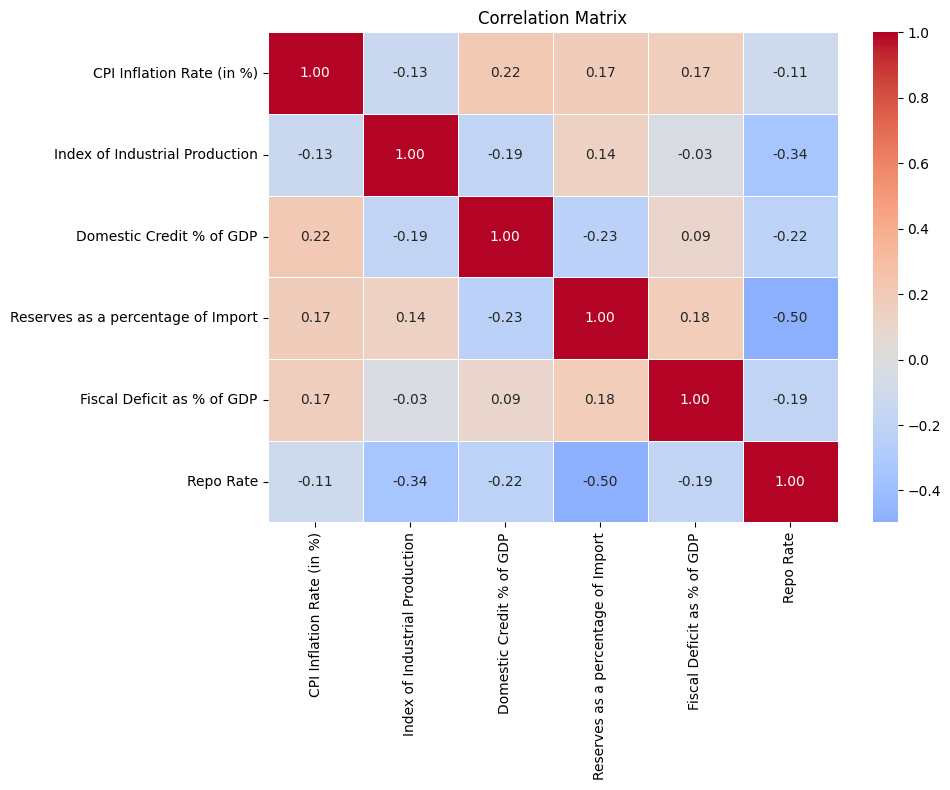

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [73]:
df_hmm = df_hmm.ffill()

In [74]:
df_hmm.tail()

,Year,CPI Inflation Rate (in %),Index of Industrial Production,Domestic Credit % of GDP,Reserves as a percentage of Import,Fiscal Deficit as % of GDP,Repo Rate
284,2024-12-01,5.22,158.0,208.683384,343.7683,5.1700,6.50
285,2025-01-01,4.26,161.6,208.683384,343.7683,5.1700,6.50
286,2025-02-01,3.61,151.1,208.683384,343.7683,5.1700,6.25
287,2025-03-01,3.34,166.3,206.905605,379.1526,7.5212,6.25
288,2025-04-01,3.16,151.8,206.905605,379.1526,7.5212,6.00


In [75]:
df_pct = df_hmm.copy()

df_pct.loc[:, df_hmm.columns != "Year"] = (
    df_hmm.loc[:, df_hmm.columns != "Year"]
    .pct_change()
)

print(df_pct.head())


         Year  CPI Inflation Rate (in %)  Index of Industrial Production  \
0  2001-04-01                        NaN                             NaN   
1  2001-05-01                        NaN                             NaN   
2  2001-06-01                        NaN                             NaN   
3  2001-07-01                        NaN                             NaN   
4  2001-08-01                        NaN                             NaN   

   Domestic Credit % of GDP  Reserves as a percentage of Import  \
0                       NaN                                 NaN   
1                       NaN                                 NaN   
2                       NaN                                 NaN   
3                       0.0                                 0.0   
4                       0.0                                 0.0   

   Fiscal Deficit as % of GDP  Repo Rate  
0                         NaN        NaN  
1                         NaN   0.000000  
2          

In [77]:
df_ff = df_pct.replace(0, pd.NA).ffill()
df_ff.head()

/var/folders/mr/tlwnp91s3vg6__jg3wv2py680000gn/T/ipykernel_4904/95487112.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ff = df_pct.replace(0, pd.NA).ffill()


,Year,CPI Inflation Rate (in %),Index of Industrial Production,Domestic Credit % of GDP,Reserves as a percentage of Import,Fiscal Deficit as % of GDP,Repo Rate
0,2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-06-01,NaN,NaN,NaN,NaN,NaN,-0.028571
3,2001-07-01,NaN,NaN,NaN,NaN,NaN,-0.028571
4,2001-08-01,NaN,NaN,NaN,NaN,NaN,-0.028571


In [ ]:
df_ff = df_ff.dropna()
df_ff.head()

,Year,CPI Inflation Rate (in %),Index of Industrial Production,Domestic Credit % of GDP,Reserves as a percentage of Import,Fiscal Deficit as % of GDP,Repo Rate
154,2014-02-01,-0.083721,-0.049866,-0.060534,0.059064,-0.357406,0.032258
155,2014-03-01,0.046954,0.110590,0.020431,-0.016021,-1.075391,0.032258
156,2014-04-01,0.027879,-0.100422,0.020431,-0.016021,-1.075391,0.032258
157,2014-05-01,-0.017689,0.041276,0.020431,-0.016021,-1.075391,0.032258
158,2014-06-01,-0.187275,-0.011712,0.042717,0.058921,-38.965453,0.032258


In [ ]:
ticker = "^NSEI"

nifty = yf.download(
    ticker,
    start="2015-01-01",
    end="2025-01-01",
    interval="1mo",
    auto_adjust=False
)

[*********************100%***********************]  1 of 1 completed


In [10]:
nifty.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2015-01-01,8808.900391,8808.900391,8996.599609,8065.450195,8288.700195,3373200
2015-02-01,8844.599609,8844.599609,8913.450195,8470.500000,8802.500000,3430800
2015-03-01,8491.000000,8491.000000,9119.200195,8269.150391,8953.849609,3727800
2015-04-01,8181.500000,8181.500000,8841.650391,8144.750000,8483.700195,3108200
2015-05-01,8433.650391,8433.650391,8489.549805,7997.149902,8230.049805,3384800


In [81]:
df = df_ff
df.drop(columns=["Year"], inplace=True, errors="ignore")

In [82]:

n_states = 2

n_total = len(df)
split_idx = int(0.8 * n_total)

regime_probs = pd.DataFrame(
    index=range(split_idx, n_total),
    columns=[f"Regime_{i}" for i in range(n_states)],
    dtype=float
)

for i in range(split_idx, n_total):

    # Data up to time t
    df_up_to_t = df.iloc[:i]

    # Data including next month (t+1)
    df_up_to_t_plus_1 = df.iloc[:i+1]

    # Fit HMM using data up to t
    hmm = GaussianHMM(
        n_components=n_states,
        covariance_type="full",
        n_iter=1000,
        random_state=42
    )

    hmm.fit(df_up_to_t.values)

    # Filter probabilities including next month
    probs = hmm.predict_proba(df_up_to_t_plus_1.values)

    # Store P(s_{t+1} | y_{1:t+1})
    regime_probs.loc[i] = probs[-1]


Model is not converging.  Current: 278.8518936787732 is not greater than 279.36357512812083. Delta is -0.511681449347634
Model is not converging.  Current: 281.98148892457397 is not greater than 283.23510665734733. Delta is -1.253617732773364
Model is not converging.  Current: 285.50588012955166 is not greater than 287.4971648112987. Delta is -1.9912846817470609
Model is not converging.  Current: 284.39439633586045 is not greater than 287.1147844359509. Delta is -2.7203881000904744
Model is not converging.  Current: 288.1734251260572 is not greater than 291.63580153063594. Delta is -3.4623764045787198
Model is not converging.  Current: 289.9704330715967 is not greater than 294.1419464981945. Delta is -4.171513426597812
Model is not converging.  Current: 292.9602902789002 is not greater than 297.83378942492305. Delta is -4.87349914602288
Model is not converging.  Current: 295.5148342240774 is not greater than 301.09183433258386. Delta is -5.577000108506468
Model is not converging.  Curr

In [83]:
regime_probs

,Regime_0,Regime_1
108,1.0,0.0
109,1.0,0.0
110,1.0,0.0
111,1.0,0.0
112,1.0,0.0
113,1.0,0.0
114,1.0,0.0
115,1.0,0.0
116,1.0,0.0
117,1.0,0.0
